In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np


In [2]:
bikes = pd.read_csv('bike.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bikes.temp.value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

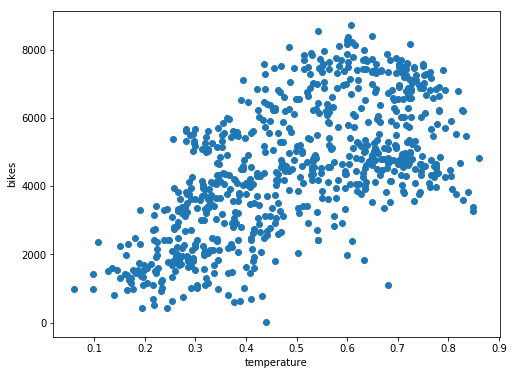

In [4]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.show()

In [5]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temp']]).T, bikes['cnt'])


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
x = np.array([5.])

regressor.predict(x.reshape(-1,1))


array([5659.41477273])

In [7]:
x = np.array([20.])
regressor.predict(x.reshape(-1,1))

array([5659.41477273])

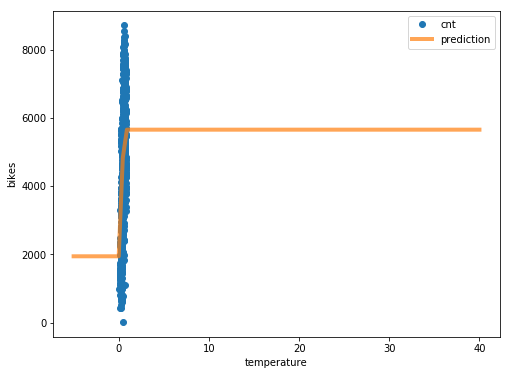

In [8]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['temp'])

In [10]:
from os import system
system('dot -Tpng tree.dot > tree.png') # to convert the tree in a png image

1

In [11]:
from IPython.display import Image
Image(filename='tree.png') 